<a href="https://colab.research.google.com/github/TWentCEO/DataAnalyst/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("/content/drive/MyDrive/datasets/auto-mpg.csv", header=None)

In [77]:
df = df.drop(df.index[0])

In [51]:
#df = df.rename(columns=df.iloc[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       399 non-null    object
 1   1       399 non-null    object
 2   2       399 non-null    object
 3   3       399 non-null    object
 4   4       399 non-null    object
 5   5       399 non-null    object
 6   6       399 non-null    object
 7   7       399 non-null    object
 8   8       399 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [78]:
# 열 이름 지정
df.columns=['mpg','cylinders','displacement','horsepower','weight',
            'acceleration','model year','origin','name']

In [79]:
idx = df[df['horsepower'] == "?"].index

In [80]:
df.drop(idx, inplace=True)

In [81]:
for i in df.columns[0:-1]:
    df[i] = df[i].astype('float')

mpg
cylinders
displacement
horsepower
weight
acceleration
model year
origin


In [82]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    float64
 7   origin        392 non-null    float64
 8   name          392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


In [84]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
1,18.0,8.0,130.0,3504.0
2,15.0,8.0,165.0,3693.0
3,18.0,8.0,150.0,3436.0
4,16.0,8.0,150.0,3433.0
5,17.0,8.0,140.0,3449.0


<Axes: xlabel='weight', ylabel='mpg'>

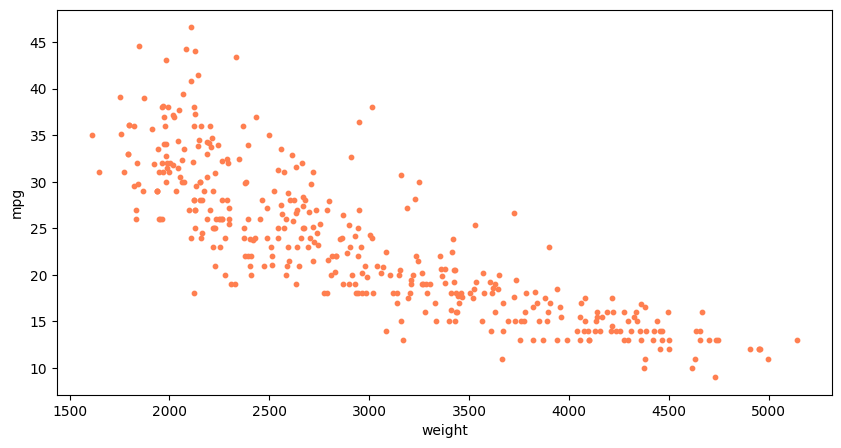

In [87]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))

In [88]:
X = ndf[['weight']]
print(type(X))   # <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [94]:
y = ndf[['mpg']]
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [95]:
print(len(X), len(y))

392 392


In [90]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
print("Train 개수 : ", len(X_train))
print("Test 개수 : ", len(X_test))

Train 개수 :  274
Test 개수 :  118


In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lr = LinearRegression()

In [99]:
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [101]:
y_hat = lr.predict(X)

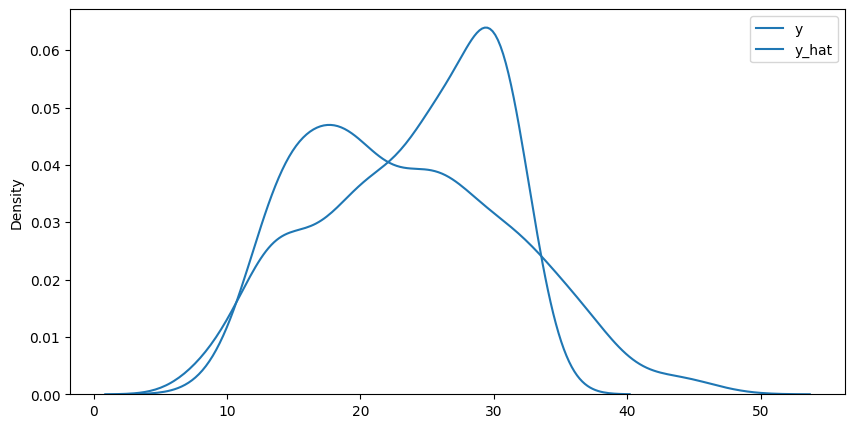

In [108]:
fig = plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label="y")                   # 실제 mpg 데이터의 그래프(정답). kdeplot : 빈도수, 밀도에 해당
ax2 = sns.kdeplot(y_hat, label='y_hat',color = 'red')   # 예측한 값
plt.legend()
plt.show()